In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
%matplotlib notebook
import matplotlib.patheffects as PathEffects

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]


In [14]:
data = np.load('output/zeropoint_kep.npy')
data = np.load('output/kep_com_zp.npy')
#err = np.load('output/zeropoint_z.npy')
c1 = data[1]
#c1err = err[1] 
c18 = data[18]
#c16err = err[12]

In [15]:
fp = np.zeros((10,10))
fp[0:2,0:2] = np.nan
fp[8:10,8:10] = np.nan
fp[0:2,8:10] = np.nan
fp[8:10,0:2] = np.nan

fp[0,2] = 4; fp[0,3] = 3; fp[1,2] = 1; fp[1,3] = 2
fp[0,4] = 8; fp[0,5] = 7; fp[1,4] = 5; fp[1,5] = 6
fp[0,6] = 12; fp[0,7] = 11; fp[1,6] = 9; fp[1,7] = 10

fp[2,0] = 15; fp[2,1] = 14; fp[3,0] = 16; fp[3,1] = 13
fp[2,2] = 20; fp[2,3] = 19; fp[3,2] = 17; fp[3,3] = 18
fp[2,4] = 24; fp[2,5] = 23; fp[3,4] = 21; fp[3,5] = 22
fp[2,4] = 24; fp[2,5] = 23; fp[3,4] = 21; fp[3,5] = 22
fp[2,6] = 25; fp[2,7] = 28; fp[3,6] = 26; fp[3,7] = 27
fp[2,8] = 29; fp[2,9] = 32; fp[3,8] = 30; fp[3,9] = 31

fp[4,0] = 35; fp[4,1] = 34; fp[5,0] = 36; fp[5,1] = 33
fp[4,2] = 39; fp[4,3] = 38; fp[5,2] = 40; fp[5,3] = 37
fp[4,4] = 43; fp[4,5] = 42; fp[5,4] = 44; fp[5,5] = 41
fp[4,6] = 45; fp[4,7] = 48; fp[5,6] = 46; fp[5,7] = 47
fp[4,8] = 49; fp[4,9] = 52; fp[5,8] = 50; fp[5,9] = 51

fp[6,0] = 55; fp[6,1] = 54; fp[7,0] = 56; fp[7,1] = 53
fp[6,2] = 59; fp[6,3] = 58; fp[7,2] = 60; fp[7,3] = 57
fp[6,4] = 62; fp[6,5] = 61; fp[7,4] = 63; fp[7,5] = 64
fp[6,6] = 66; fp[6,7] = 65; fp[7,6] = 67; fp[7,7] = 68
fp[6,8] = 69; fp[6,9] = 72; fp[7,8] = 70; fp[7,9] = 71


fp[8,2] = 74; fp[8,3] = 73; fp[9,2] = 75; fp[9,3] = 76
fp[8,4] = 78; fp[8,5] = 77; fp[9,4] = 79; fp[9,5] = 80
fp[8,6] = 82; fp[8,7] = 81; fp[9,6] = 83; fp[9,7] = 84



<IPython.core.display.Javascript object>


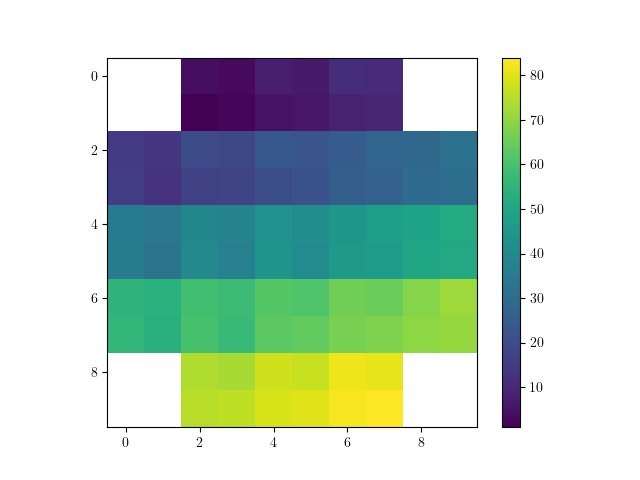

In [16]:
plt.figure()
plt.imshow(fp)#,origin='lower')
plt.colorbar()

In [17]:
c1

array([        nan, 25.3708951 , 25.41168765, 25.32259535, 25.33300952,
               nan,         nan,         nan,         nan, 25.37714267,
       25.31364389, 25.28345235, 25.30324401, 25.31629052, 25.28552215,
       25.27441529, 25.29589115,         nan,         nan,         nan,
               nan, 25.45440256, 25.4304885 , 25.4139832 , 25.41951881,
       25.4218726 , 25.42724913, 25.40545533, 25.3837852 , 25.36924604,
       25.36356003, 25.34234359, 25.37472167, 25.31086846, 25.32936202,
       25.25094606, 25.3050697 , 25.40704244, 25.41241399, 25.40579684,
       25.42803316, 25.38147641, 25.38973519, 25.40202567, 25.35969292,
       25.3980742 , 25.40033918, 25.37069221, 25.35893956, 25.34394369,
       25.35086534, 25.26411898, 25.27196266, 25.33927587, 25.34889042,
       25.37953079, 25.338255  , 25.41195983, 25.42372922, 25.3962831 ,
       25.37307015, 25.3660699 , 25.37058795, 25.39027068, 25.37864652,
       25.38240721, 25.45498089, 25.38107442, 25.36485731, 25.38

In [18]:
c1zps = fp.copy()
for i in range(10):
    for j in range(10):
        if np.isfinite(fp[i,j]):
            c1zps[i,j] = c1[int(fp[i,j])-1]
c18zps = fp.copy()
for i in range(10):
    for j in range(10):
        if np.isfinite(fp[i,j]):

            c18zps[i,j] = c18[int(fp[i,j])-1]
'''
err = fp.copy()
for i in range(10):
    for j in range(10):
        if np.isfinite(fp[i,j]):
            err[i,j] = c16err[int(fp[i,j])-1] + c1err[int(fp[i,j])-1]
c1zps[c1zps == 0] = np.nan
c16zps[c16zps == 0] = np.nan
err[err == 0] = np.nan
'''            

'\nerr = fp.copy()\nfor i in range(10):\n    for j in range(10):\n        if np.isfinite(fp[i,j]):\n            err[i,j] = c16err[int(fp[i,j])-1] + c1err[int(fp[i,j])-1]\nc1zps[c1zps == 0] = np.nan\nc16zps[c16zps == 0] = np.nan\nerr[err == 0] = np.nan\n'

<IPython.core.display.Javascript object>


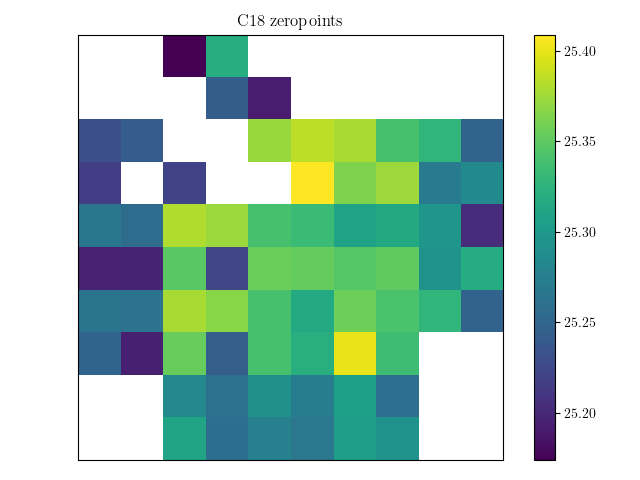

In [19]:
c18zps[c18zps == 0] = np.nan
plt.figure()
plt.title('C18 zeropoints')
plt.imshow(c18zps)#,origin='lower')
plt.colorbar()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
#plt.savefig('c16_focal_plane_zp.pdf')


In [25]:
vmax

25.45498088696093

<IPython.core.display.Javascript object>


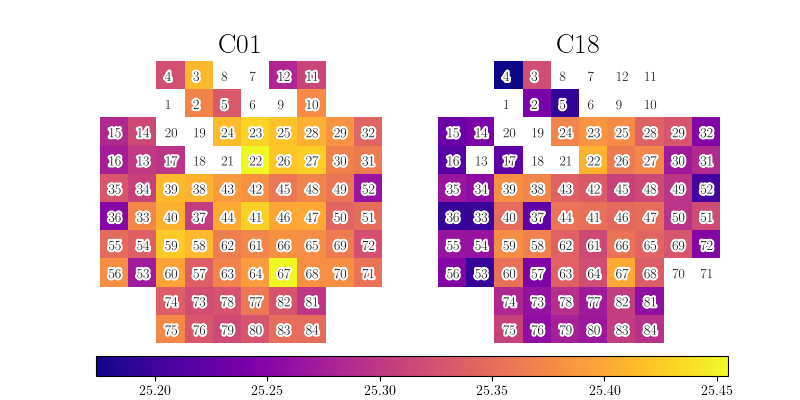

In [90]:
vmax = np.nanmax([c1zps,c18zps])
vmin = np.nanmin([c1zps,c18zps])
fig = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('C01',fontsize=20)
plt.imshow(c1zps,vmax=vmax,vmin=vmin,cmap='plasma')

y,x = np.where(np.isfinite(fp))
for i in range(len(x)):
    txt = plt.text(x[i]-.2,y[i]+.2,str(int(fp[y[i],x[i]])),)
    txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])

plt.axis('off')

plt.subplot(1,2,2)
plt.title('C18',fontsize=20)
im = plt.imshow(c18zps,vmax=vmax,vmin=vmin,cmap='plasma')

y,x = np.where(np.isfinite(fp))
for i in range(len(x)):
    txt = plt.text(x[i]-.2,y[i]+.2,str(int(fp[y[i],x[i]])),)
    txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])

plt.axis('off')

cbar_ax = fig.add_axes([.12, 0.06, .79, 0.05])
cbar = fig.colorbar(im, cax=cbar_ax,orientation="horizontal")
cbar.set_label('Zeropoint',fontsize=15)


plt.savefig('c1zp_c18zp.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


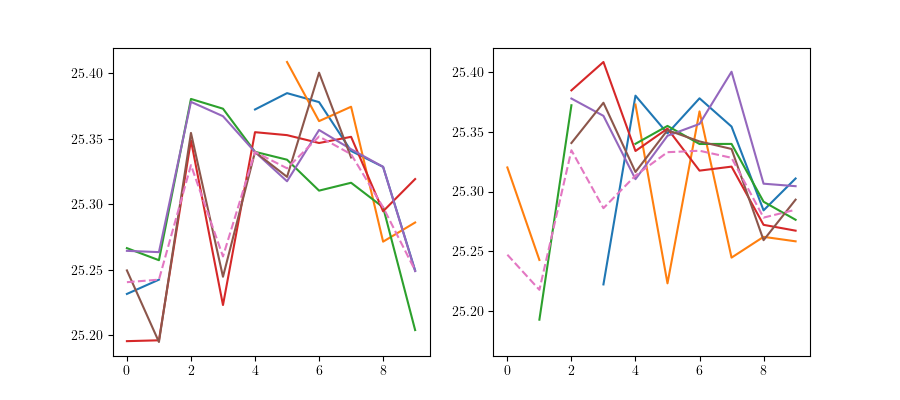

In [102]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for i in range(c18zps.shape[0]-4):
    i+=2
    plt.plot(c18zps[i,:],'-')

plt.plot(np.nanmedian(c18zps,axis=0),'--')

plt.subplot(122)
for i in range(c18zps.shape[1]-4):
    i+=2
    plt.plot(c18zps[:,i],'-')
plt.plot(np.nanmedian(c18zps,axis=1),'--')

In [ ]:
def 

<IPython.core.display.Javascript object>


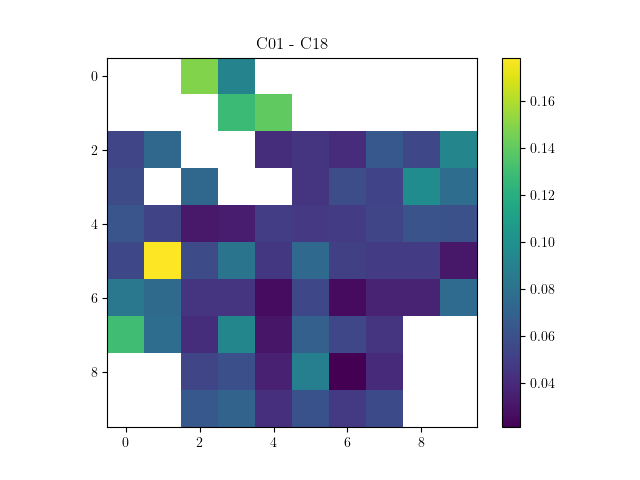

In [21]:
plt.figure()
plt.title('C01 - C18')
plt.imshow((c1zps-c18zps))#,origin='lower')
plt.colorbar()
plt.savefig('c1zp-c18zp.png')

In [35]:
err

array([[        nan,         nan, -0.00111591, -0.00614566,         nan,
                nan, -0.03218906, -0.01053267,         nan,         nan],
       [        nan,         nan, -0.01526121, -0.00047424,         nan,
                nan,  0.00186107, -0.01139059,         nan,         nan],
       [-0.02555976, -0.02094863,         nan,         nan, -0.02699586,
        -0.02804885, -0.00026158, -0.01144599, -0.00660597, -0.02955799],
       [-0.03400954, -0.0128754 ,         nan,         nan, -0.0122115 ,
        -0.00097934, -0.01361568, -0.00652114, -0.02078669, -0.01072931],
       [-0.04009034, -0.01209718, -0.01992643, -0.00819377, -0.0218532 ,
        -0.02277725, -0.00404607, -0.0271502 , -0.01590075, -0.01984477],
       [-0.03898679, -0.02417812, -0.02475189, -0.01882615, -0.00880392,
        -0.02630251, -0.02303792, -0.02201349, -0.01741028, -0.01449764],
       [-0.02165391, -0.02533724, -0.00717283, -0.02284443, -0.01519786,
        -0.02542735, -0.02564598, -0.01071449